# Author : Saurabh Singhai

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries</a></span></li><li><span><a href="#Load-Dataset" data-toc-modified-id="Load-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Dataset</a></span></li><li><span><a href="#Read-Target-Coloumn" data-toc-modified-id="Read-Target-Coloumn-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Read Target Coloumn</a></span></li><li><span><a href="#Find-Null-Values" data-toc-modified-id="Find-Null-Values-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Find Null Values</a></span></li><li><span><a href="#Train_test_split" data-toc-modified-id="Train_test_split-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train_test_split</a></span></li><li><span><a href="#Standardize-the-data" data-toc-modified-id="Standardize-the-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Standardize the data</a></span></li><li><span><a href="#Implement-SGD" data-toc-modified-id="Implement-SGD-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Implement SGD</a></span></li><li><span><a href="#Use-SKLearn-SGD" data-toc-modified-id="Use-SKLearn-SGD-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Use SKLearn SGD</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

## Import Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import sklearn
import seaborn as sns

from collections import Counter
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
import pandas as pd
import math
from sklearn.model_selection import train_test_split

## Load Dataset

In [2]:
boston = load_boston()
# Shape of Boston datasets
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [4]:
boston.values()

dict_values([array([[  6.32000000e-03,   1.80000000e+01,   2.31000000e+00, ...,
          1.53000000e+01,   3.96900000e+02,   4.98000000e+00],
       [  2.73100000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.96900000e+02,   9.14000000e+00],
       [  2.72900000e-02,   0.00000000e+00,   7.07000000e+00, ...,
          1.78000000e+01,   3.92830000e+02,   4.03000000e+00],
       ..., 
       [  6.07600000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   5.64000000e+00],
       [  1.09590000e-01,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.93450000e+02,   6.48000000e+00],
       [  4.74100000e-02,   0.00000000e+00,   1.19300000e+01, ...,
          2.10000000e+01,   3.96900000e+02,   7.88000000e+00]]), array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15

In [5]:
columnNames = boston.feature_names
print(columnNames)
Data = pd.DataFrame(boston.data, columns = columnNames)


['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
Data.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Read Target Coloumn

In [7]:
print(boston.target[:10])

[ 24.   21.6  34.7  33.4  36.2  28.7  22.9  27.1  16.5  18.9]


In [8]:
Data_Labels = boston.target
Data_Labels.shape
Data["PRICE"] = Data_Labels
print(Data.shape)
print(Data.head(2))

(506, 14)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   

   PTRATIO      B  LSTAT  PRICE  
0     15.3  396.9   4.98   24.0  
1     17.8  396.9   9.14   21.6  


## Find Null Values

In [9]:
Data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

## Train_test_split

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(Data, Data["PRICE"],test_size = 0.2)

print(X_train.head(10))

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
221   0.40771   0.0   6.20   1.0  0.507  6.164   91.3  3.0480   8.0  307.0   
116   0.13158   0.0  10.01   0.0  0.547  6.176   72.5  2.7301   6.0  432.0   
74    0.07896   0.0  12.83   0.0  0.437  6.273    6.0  4.2515   5.0  398.0   
337   0.03041   0.0   5.19   0.0  0.515  5.895   59.6  5.6150   5.0  224.0   
361   3.83684   0.0  18.10   0.0  0.770  6.251   91.1  2.2955  24.0  666.0   
504   0.10959   0.0  11.93   0.0  0.573  6.794   89.3  2.3889   1.0  273.0   
402   9.59571   0.0  18.10   0.0  0.693  6.404  100.0  1.6390  24.0  666.0   
298   0.06466  70.0   2.24   0.0  0.400  6.345   20.1  7.8278   5.0  358.0   
438  13.67810   0.0  18.10   0.0  0.740  5.935   87.9  1.8206  24.0  666.0   
211   0.37578   0.0  10.59   1.0  0.489  5.404   88.6  3.6650   4.0  277.0   

     PTRATIO       B  LSTAT  PRICE  
221     17.4  395.24  21.46   21.7  
116     17.8  393.30  12.04   21.2  
74      18.7  394.92   6.78   

In [11]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((404, 14), (102, 14), (404,), (102,))

## Standardize the data

In [12]:
#First Standadize the data
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

std_scale = scaler.fit(X_train[['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']])
train_standardized= std_scale.transform(X_train[['CRIM', 'ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']])
test_standardized= std_scale.transform(X_test[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']])

In [13]:
X_train_standardized = pd.DataFrame(train_standardized, columns = columnNames)
X_test_standardized = pd.DataFrame(test_standardized, columns = columnNames)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

print("="*50)
print(Y_train)
print("="*50)
print(Y_train.shape)
print("="*50)
print(X_train_standardized.shape)

[ 21.7  21.2  24.1  18.5  19.9  22.   12.1  22.5   8.4  19.3  20.4  24.5
  18.3  50.   50.   23.8  19.9  20.8  28.4  21.5  17.5  21.9  12.7  23.2
  22.9  15.6  23.    7.4  29.   37.6  19.6  43.1  10.2  19.4  29.8  21.4
  11.9  22.2  21.8  11.7  27.9  17.8   5.   20.6  33.3  20.5  50.   10.2
  18.3  31.5  19.7  17.   23.3  16.6  28.7  15.3  19.3  20.6  22.1  43.5
  23.8  25.   20.4  17.8  10.5  19.4  17.6  24.8  42.3  17.5  13.3  18.7
  29.    9.7  18.2  22.   35.2  20.7  18.4  14.4  30.1  22.   19.3  29.4
  21.   34.7  13.3  31.6  13.1  30.1  17.2  46.   35.4  16.8  32.2  22.
  25.   50.   20.1  19.4  18.7  22.2  19.6  21.1  21.   28.1  29.9  19.5
  18.4   7.   36.1  21.7  17.4  30.1   7.2  48.5  30.3  41.3  32.5  22.2
  21.7  14.6  24.7  22.6  19.5  19.5  19.8   6.3  20.   25.    5.   23.1
  23.6  11.5  17.2  31.1  13.4  10.5  20.8  20.4  19.6  11.3  15.   34.9
  31.7  26.7  17.8  20.3  11.9  13.4  21.8  20.2  16.1  15.4  18.   19.1
  21.1  23.9   8.4   8.8  19.3  31.5  19.1  14.3  25

In [14]:
X_train_standardized['PRICE']=Y_train
X_test_standardized['PRICE']=Y_test

In [15]:
print(X_train_standardized.shape)
print(X_test_standardized.shape)

(404, 14)
(102, 14)


## Implement SGD

In [16]:
#https://github.com/gauravtheP/Implementing-Stochastic-GradientDescent/blob/master/LinearRegression_SGD_BostonHomePrices.ipynb
# First step initilize the weights and b
# Slope intercept form s=mx+b.
# mx is the weights*x1....weights_d*xd
# b is the intercept term

m = X_train.shape[0]

weight = np.random.randn(13)*np.sqrt(2/m) # defining initial random weight from normal distribution

b = np.random.randn(1)*np.sqrt(2/m) # generating initial random y-intercept from normal distribution

# initilize learing rate
learningRate = 0.2
print(m,weight,b,learningRate)


for i in range(2000): # running 2000 iterations
    Data_batch_10 = X_train_standardized.sample(n = 10) # taking 10 stochastic samples
    X_temp = Data_batch_10.drop("PRICE", axis = 1, inplace = False) # DROP the price label, because this is the output label we have to predict.
    X=X_temp
    Y = Data_batch_10["PRICE"]
    PartialGradient = np.empty(13)# in this we store the partial derivate with respect to w...we have 13 features  13 features
    sum2 = 0
# Update the weights-------------------------------
# formula (w0=w1-lr*derivate)in every iteration

# STEP#1.
#--------
#First calculate the derivative
    for j in range(13): # as there are 13 dimensions in our dataset and dimensions of weight should also be same as dimension of our dataset
        sum1 = 0
        for k in range(10):
            sum1 += -2 * X.iloc[k][j] * (Y.iloc[k] - np.dot(weight, X.iloc[k]) - b) # this is a derivative of linear regression w.r.t 'w
        PartialGradient[j] = sum1
        
# STEP#2.
#--------
#multiply with learning rate
    PartialGradient *= learningRate
    
# STEP#3.
#--------
#Update the weights
    for l in range(13):
        weight[l] -= PartialGradient[l] # updating weights
        
# Update the Intercepts or (b's)-------------------------------
    for m in range(10):
        sum2 += -2 * (Y.iloc[m]- np.dot(weight, X.iloc[m]) - b) # this is the derivative of linear regression w.r.t 'b'
    b = b - learningRate * sum2 #updating y-intercept 'b'
# in every iteration u have to reduce the learing rate 
    learningRate = 0.01 / pow(i+1, 0.25) #learning rate at every iteration
# just add the regularization term to it
    weight = weight + 0.0001*np.dot(weight, weight) #adding l2 regularization
    b = b + 0.0001*np.dot(weight, weight) #adding L2 regularization
print("Weight = "+str(weight))
print("b = "+str(b))

404 [ 0.02227997  0.12424859  0.07334289  0.13013477  0.0360016   0.04797156
  0.04805543 -0.00959031  0.10509333  0.00672592 -0.09315377 -0.12427005
  0.11633426] [-0.05379845] 0.2
Weight = [-0.40759152  1.08887901  0.43421475  0.89736121 -1.83728164  2.97616813
  0.6330621  -2.16034948  2.24545928 -2.26065628 -1.81281784  1.29698828
 -3.60069238]
b = [ 22.09991046]


In [17]:
# time for testdata.. with our updated weights and coeffcients
import math
test_temp = X_test_standardized.drop("PRICE", axis = 1, inplace = False)
test_data = test_temp
test_labels = Y_test
y_predicted = []
for i in range(102):
    test_i = 0
    test_i = np.dot(weight, test_data.iloc[i]) + b[0] #making prediction by using optimize values of weights obtained from SGD
    y_predicted.append(test_i)

In [18]:
#Make the preditions
d1 = {'True Labels': Y_test, 'Predicted Labels': y_predicted}
df1 = pd.DataFrame(data = d1)

In [19]:
My_Mean_Sq_Error = mean_squared_error(Y_test, y_predicted)
print(My_Mean_Sq_Error)

28.2303459746


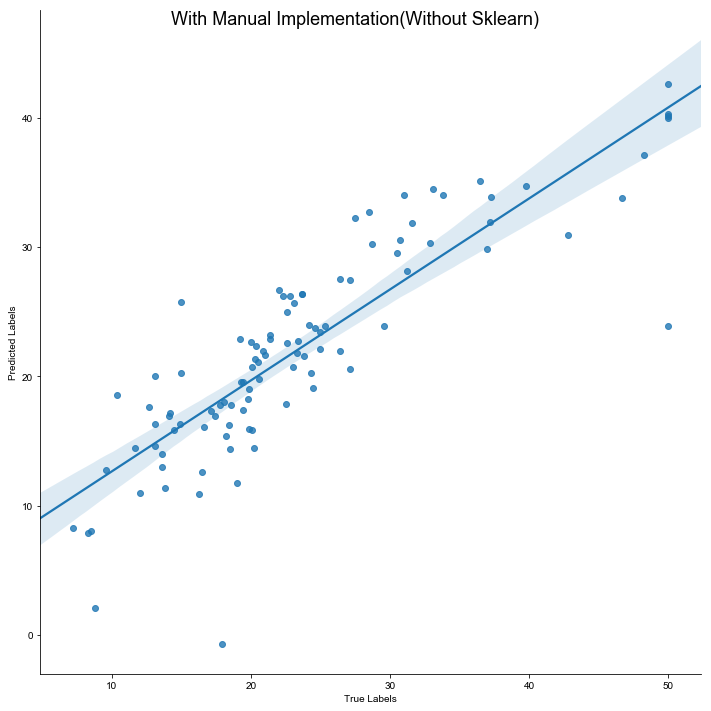

In [20]:
import seaborn as sns
%matplotlib inline
lm1 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df1, size = 10)
fig1 = lm1.fig
fig1.suptitle("With Manual Implementation(Without Sklearn)", fontsize=18)
sns.set(font_scale = 1.5)

## Use SKLearn SGD

In [21]:
#Sklearn implementation
X_temp = X_train_standardized.drop("PRICE", axis = 1, inplace = False)
X=X_temp
Y = Y_train
X_test_temp = X_test_standardized.drop("PRICE", axis = 1, inplace = False)
X_te=X_test_temp
Y_te = Y_test
clf = SGDRegressor(shuffle = False, learning_rate= 'invscaling', max_iter = 2000)
clf.fit(X, Y)# fir train data
Y_pred = clf.predict(X_te)# predict test error
print("Weight = "+str(clf.coef_))
print("Y Intercept = "+str(clf.intercept_))

Weight = [-0.61173094  1.00475583  0.13724696  0.88966024 -2.01484363  2.30659191
  0.05914557 -3.12641841  2.39890687 -1.77518791 -2.0349143   0.90127311
 -4.13311225]
Y Intercept = [ 22.3107813]


In [22]:
d2 = {'True Labels': Y_te, 'Predicted Labels': Y_pred}
df2 = pd.DataFrame(data = d2)
df2


,Predicted Labels,True Labels
0,23.815617,19.2
1,27.231606,22.0
2,26.614621,22.3
3,11.623463,12.0
4,33.630880,37.3
5,21.399262,20.6
6,32.442752,37.2
7,30.454901,30.7
8,22.459225,20.3
9,17.094959,17.1


In [23]:
Mean_Sq_Error = mean_squared_error(Y_te, Y_pred)
Mean_Sq_Error

28.240640661030529

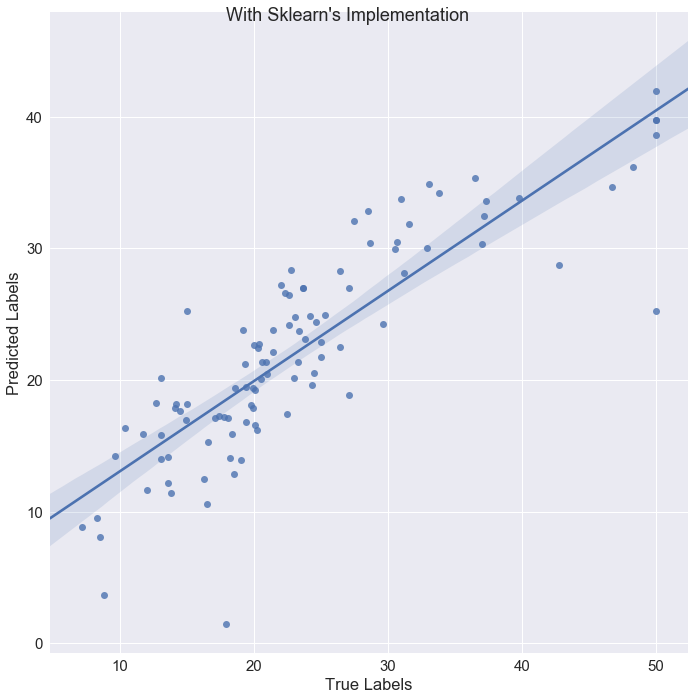

In [24]:
lm2 = sns.lmplot(x="True Labels", y="Predicted Labels", data = df2, size = 10)
fig2 = lm2.fig
# Add a title to the Figure
fig2.suptitle("With Sklearn's Implementation", fontsize=18)
sns.set(font_scale = 1.5)

## Conclusion

In [25]:
print("Sklearn SGD Impementation error=", Mean_Sq_Error)
print("*"*50)
print("My SGD Impementation error=", My_Mean_Sq_Error)

Sklearn SGD Impementation error= 28.240640661
**************************************************
My SGD Impementation error= 28.2303459746
